In [182]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from sklearn import manifold, datasets
from scipy.stats import gaussian_kde

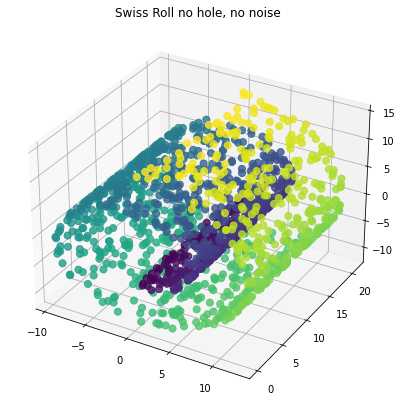

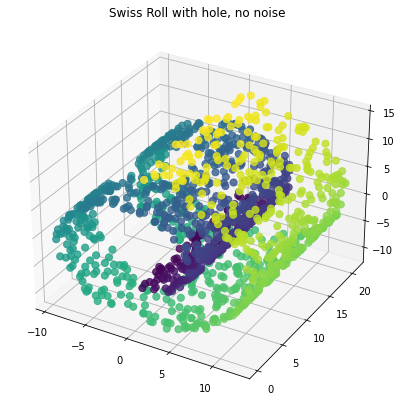

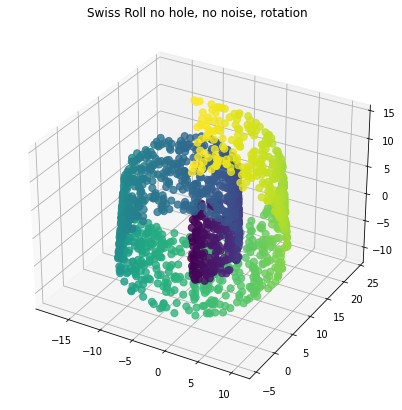

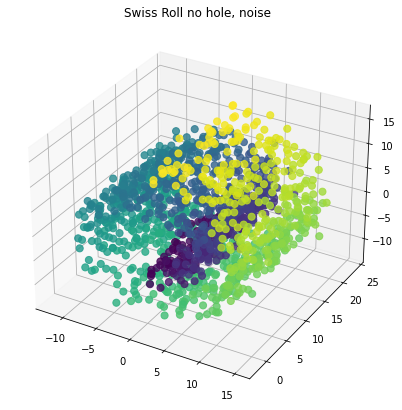

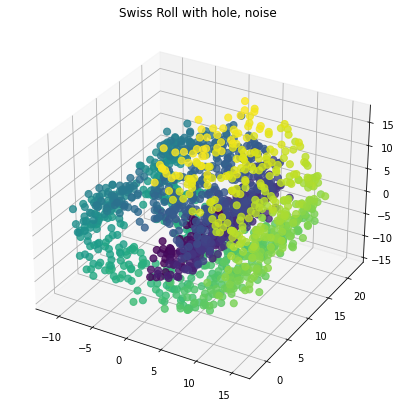

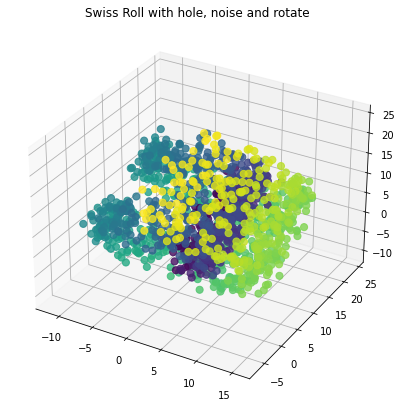

In [208]:
###1.Swiss roll and Swiss roll with hole
#no hole
n=1500
data_nohole, color_nohole = datasets.make_swiss_roll(n_samples=n,noise=0,random_state=1,hole=False)
fig = plt.figure(figsize=(8, 7))
ax = plt.axes(projection="3d")
ax.scatter(data_nohole[:, 0], data_nohole[:, 1], data_nohole[:, 2], c=color_nohole, s=50, alpha=0.8)
ax.set_title("Swiss Roll no hole, no noise")
plt.show()
#with hole
data_hole, color_hole = datasets.make_swiss_roll(n_samples=n,noise=0,random_state=1,hole=True)
fig = plt.figure(figsize=(8, 7))
ax = plt.axes(projection="3d")
ax.set_title("Swiss Roll with hole, no noise")
ax.scatter(data_hole[:, 0], data_hole[:, 1], data_hole[:, 2], c=color_hole, s=50, alpha=0.8)
plt.show()

#stage1 total dimension 20 with 17 zeros
#data of one column to be one points
data_nohole = np.append(data_nohole,[[0]*17]*n,1)
data_nohole = np.transpose(data_nohole)##

data_hole = np.append(data_hole,[[0]*17]*n,1)
data_hole = np.transpose(data_hole)##

#stage2 rotation
#30degree
theta = np.radians(30)
rotation = np.identity(20)
rotation[2,2]=np.cos(theta)
rotation[1,2]=-np.sin(theta)
rotation[2,1]=np.sin(theta)
rotation[1,1]=np.cos(theta)

rotation1 = np.identity(20)
rotation1[0,0]=np.cos(theta)
rotation1[0,1]=-np.sin(theta)
rotation1[1,0]=np.sin(theta)
rotation1[1,1]=np.cos(theta)


rot_nohole=rotation1.dot(data_nohole)##

fig = plt.figure(figsize=(8, 7))
ax = plt.axes(projection="3d")
ax.set_title("Swiss Roll no hole, no noise, rotation")
ax.scatter(rot_nohole[0, :], rot_nohole[1, :], rot_nohole[2, :], c=color_nohole, s=50, alpha=0.8)
plt.show()

rot_hole=rotation.dot(data_hole)##

#stage3
data_noise_nohole, color_noise_nohole = datasets.make_swiss_roll(n_samples=n,noise=1,random_state=1,hole=False)
fig = plt.figure(figsize=(8, 7))
ax = plt.axes(projection="3d")
ax.scatter(data_noise_nohole[:, 0], 
           data_noise_nohole[:, 1], 
           data_noise_nohole[:, 2], 
           c=color_noise_nohole, s=50, alpha=0.8)
ax.set_title("Swiss Roll no hole, noise")
plt.show()

data_noise_hole, color_noise_hole = datasets.make_swiss_roll(n_samples=n,noise=1,random_state=1,hole=True)
fig = plt.figure(figsize=(8, 7))
ax = plt.axes(projection="3d")
ax.scatter(data_noise_hole[:, 0], 
           data_noise_hole[:, 1], 
           data_noise_hole[:, 2], 
           c=color_noise_hole, s=50, alpha=0.8)
ax.set_title("Swiss Roll with hole, noise")
plt.show()

data_noise_nohole = np.append(data_noise_nohole,[[0]*17]*n,1)
data_noise_nohole = np.transpose(data_noise_nohole)##

data_noise_hole = np.append(data_noise_hole,[[0]*17]*n,1)
data_noise_hole = np.transpose(data_noise_hole)##

rot_noise_hole = rotation.dot(data_noise_hole)##
fig = plt.figure(figsize=(8, 7))
ax = plt.axes(projection="3d")
ax.scatter(rot_noise_hole[0, :], 
           rot_noise_hole[1, :], 
           rot_noise_hole[2, :], 
           c=color_noise_hole, s=50, alpha=0.8)
ax.set_title("Swiss Roll with hole, noise and rotate")
plt.show()

##Seven datasets(20*n matrix) used for manifold learning:
#1.data_nohole 
#2.data_hole 
#3.rot_nohole
#4.rot_hole
#5.data_noise_nohole
#6.data_noise_hole
#7.rot_noise_hole
#**every column to be each observation, e.g:data_nohole[:,0] 
#plot use: axes to be e.g:data_nohole[0,:] 
np.savetxt('swiss_nohole.csv', data_nohole, delimiter=',')
np.savetxt('swiss_hole.csv', data_hole, delimiter=',')
np.savetxt('swiss_rot_nohole.csv', rot_nohole, delimiter=',')
np.savetxt('swiss_rot_hole.csv', rot_hole, delimiter=',')
np.savetxt('swiss_noise_nohole.csv', data_noise_nohole, delimiter=',')
np.savetxt('swiss_noise_hole.csv', data_noise_hole, delimiter=',')
np.savetxt('swiss_rot_noise_hole.csv', rot_noise_hole, delimiter=',')


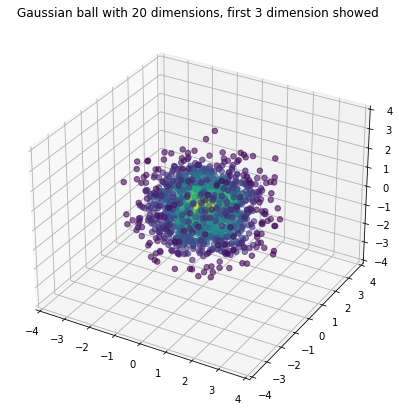

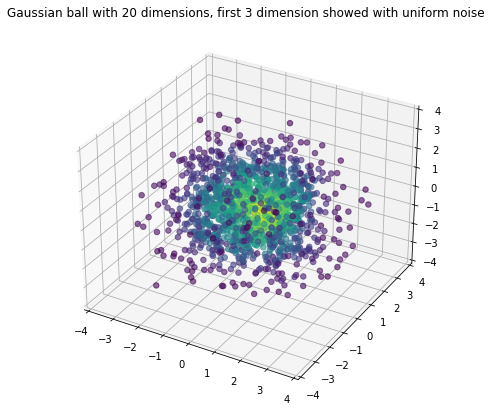

In [209]:
###2.Gaussian Ball with 20 dimensions
#stage1:
dim=20
mean = [0]*dim
cov = np.identity(dim)*0.85
a= np.random.multivariate_normal(mean, cov, n).T
fig = plt.figure(figsize=(8, 7))
ax = plt.axes(projection="3d")

xyz = np.vstack([a[0,:],a[1,:],a[2,:]])
density = stats.gaussian_kde(xyz)(xyz) 
idx = density.argsort()
x, y, z, density = a[0,:][idx], a[1,:][idx], a[2,:][idx], density[idx]
ax.scatter(x,y,z,c=density, s=30, alpha=0.6)
ax.set_title("Gaussian ball with 20 dimensions, first 3 dimension showed")
ax.axes.set_xlim3d(left=-4, right=4) 
ax.axes.set_ylim3d(bottom=-4, top=4) 
ax.axes.set_zlim3d(bottom=-4, top=4)
plt.show()

#stage3 add uniform noise:
a_noise=a+np.random.uniform(-1.5,1.5,n*dim).reshape((dim,n))
fig = plt.figure(figsize=(8, 7))
ax = plt.axes(projection="3d")
xyz = np.vstack([a_noise[0,:],a_noise[1,:],a_noise[2,:]])
density = stats.gaussian_kde(xyz)(xyz) 
idx = density.argsort()
x, y, z, density = a_noise[0,:][idx], a_noise[1,:][idx], a_noise[2,:][idx], density[idx]
ax.scatter(x,y,z,c=density, s=30, alpha=0.6)
ax.set_title("Gaussian ball with 20 dimensions, first 3 dimension showed with uniform noise")
ax.axes.set_xlim3d(left=-4, right=4) 
ax.axes.set_ylim3d(bottom=-4, top=4) 
ax.axes.set_zlim3d(bottom=-4, top=4)
plt.show()

##Two datasets(20*n matrix) used for manifold learning:
#1.a
#2.a_noise 
#**every column to be each observation, e.g:a[:,0] 
#plot use: axes to be e.g:data_nohole[0,:] 
np.savetxt('gaussian_ball.csv', a, delimiter=',')
np.savetxt('gaussian_ball_noise.csv', a_noise, delimiter=',')

20